Sea $X_{1},\dots, X_{n}$ una $n$-muestra que se toma con distribución cuya función de densidad es
	$$f_{X}(x;\theta)=\begin{cases}
	\theta x^{\theta-1} & 0<x<1, \ \theta >0\\
	0 & \text{en otro caso}
	\end{cases}$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import random
import numpy as np
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from scipy.linalg import inv, sqrtm

import warnings
warnings.filterwarnings("ignore")

## Visualización de la distribución

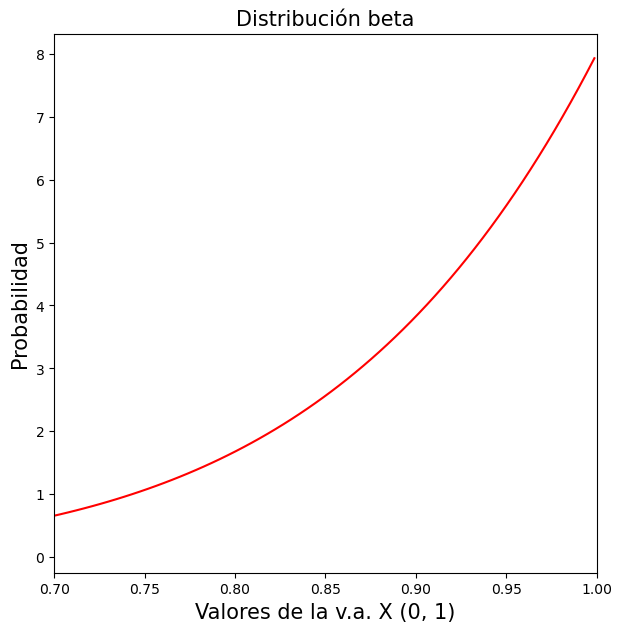

In [2]:
a, b = 8, 1

x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)

plt.figure(figsize=(7,7))
plt.xlim(0.7, 1)
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title('Distribución beta', fontsize='15')
plt.xlabel('Valores de la v.a. X (0, 1)', fontsize='15')
plt.ylabel('Probabilidad', fontsize='15')
plt.show()

In [3]:
rng = np.random.default_rng(2023)
rng.beta(a=2, b=1,  size=100)

array([0.93938311, 0.51580019, 0.37307234, 0.38914477, 0.77740958,
       0.54337839, 0.17848592, 0.47786621, 0.18023992, 0.3095778 ,
       0.72512471, 0.67556335, 0.1331451 , 0.81181434, 0.98891235,
       0.50075395, 0.87923821, 0.88619432, 0.162796  , 0.29224262,
       0.95797571, 0.60042987, 0.19166078, 0.31255984, 0.40329029,
       0.89052445, 0.29935469, 0.84933919, 0.43114001, 0.77071842,
       0.70610064, 0.7238229 , 0.85379173, 0.43007518, 0.74300819,
       0.74620432, 0.7041033 , 0.95272436, 0.87516629, 0.60110679,
       0.5934805 , 0.80481098, 0.66692606, 0.98274843, 0.36887394,
       0.92269947, 0.55973815, 0.64922114, 0.6445439 , 0.71589401,
       0.96860232, 0.80471777, 0.52343062, 0.56399784, 0.69555863,
       0.61472338, 0.68230263, 0.92301704, 0.49353235, 0.23699272,
       0.93058266, 0.42385914, 0.6439329 , 0.48692173, 0.98629523,
       0.79114752, 0.9343232 , 0.98621446, 0.28355341, 0.7107536 ,
       0.68318723, 0.25619283, 0.3348511 , 0.75270662, 0.90449

## Ilustración de la LGN

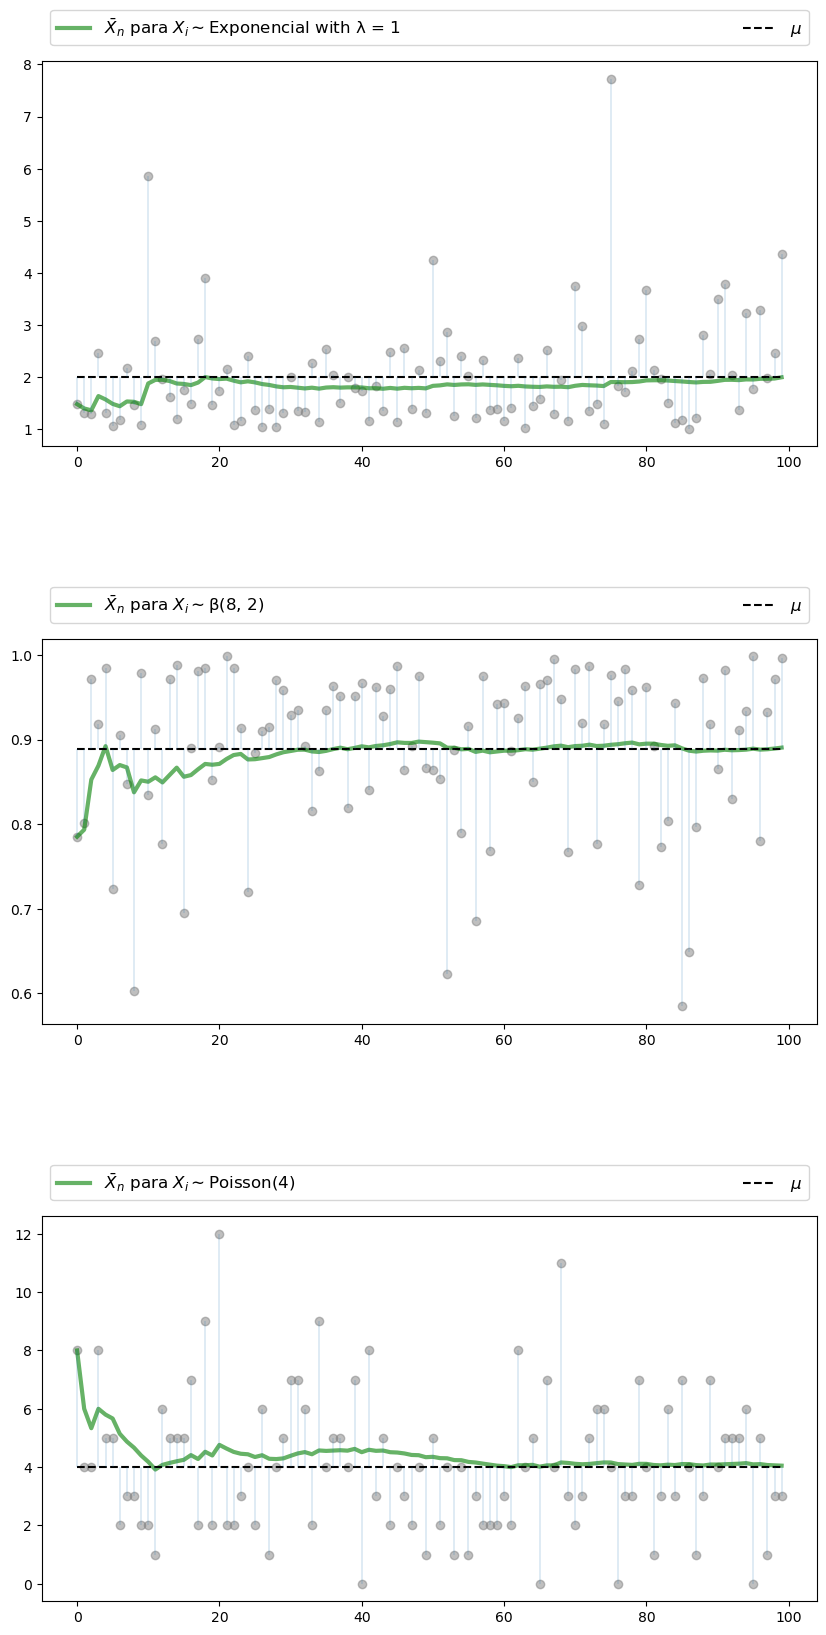

In [6]:
n = 100

# Distribuciones (familia exponencial)
distributions = {"t de Student of=10": t(10),
                 "β(8, 2)": beta(8, 1),
                 "Lognormal LN(0, 1/2)": lognorm(0.5),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "Poisson(4)": poisson(4),
                 "Exponencial with λ = 1": expon(1)}


num_graficas = 3
fig, axes = plt.subplots(num_graficas, 1, figsize=(10, 20))

# Layouts
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:

    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)


    data = distribution.rvs(n)


    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])

    # Gráficas
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar{X}_n$ para $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label='$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.show()

## Histograma y TCL

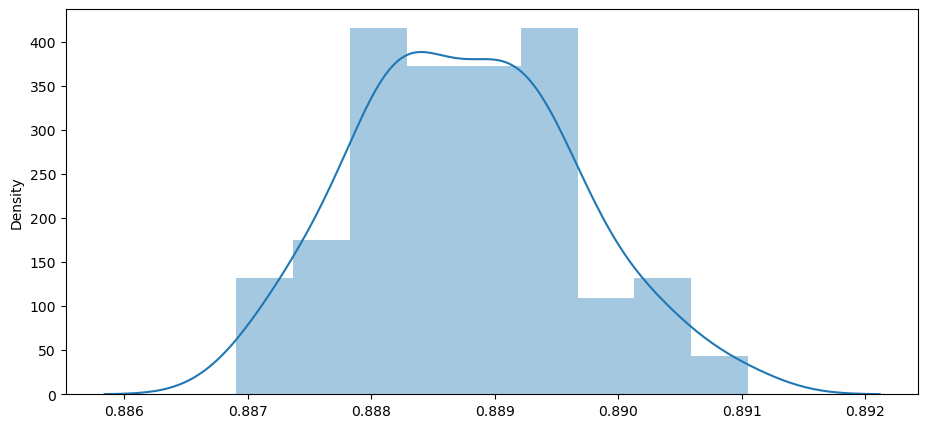

In [5]:
import pandas as pd
import seaborn as sns

np.random.seed(123)

muestra=10000

df = pd.DataFrame()

for i in range(1, 100):
    muestreo_beta = np.random.beta(8,1, muestra)
    col = f'muestra {i}'
    df[col] = muestreo_beta


df_muestra_medias = pd.DataFrame(df.mean(),columns=['Muestra de medias'])
sns.distplot(df_muestra_medias);

Para $0<x<1$ y $\theta>0$,
$$f_{X}(x;\theta)=\theta y^{\theta -1}=\theta\exp\{-(\theta-1)(-\ln(y)) \}.$$

Defínase $$W_{n}=\sum_{i=1}^{n}-\ln(X_{i}).$$

Verifiquemos que $Y=-\ln(X)\sim \exp(\tilde{\theta})$. Para $0y>0$,
\begin{align*}
F_{Y}(y)=\mathbb{P}(Y\leq y)&=\mathbb{P}(X>e^{-y})\\
&= 1-e^{-\theta y}.
\end{align*}

Por lo tanto, para $y>0 $
$$F^{\prime}_{Y}(y)=\theta e^{-\theta y}.$$
Esto es, $$Y\sim \exp(\theta).$$

---

Si $T=2\theta Y$, entonces por el teorema del estadístico inconsciente, para toda $g$ continua y acotada:
\begin{align*}
\mathbb{E}[g(T)]&=\int_{0}^{\infty}g(2\theta y)\theta e^{-\theta y}dy\\
&=\int_{0}^{\infty}g(t)\theta e^{-\theta (t/2\theta)}\frac{1}{2\theta}dt\\
&=\int_{0}^{\infty}g(t) \frac{1}{2}e^{-t/2}dt
\end{align*}

Por lo tanto,
$$T\sim \chi^{2}_{(2)}.$$

---



Sea $X\sim \chi^{2}_{(\nu)}$. Por el teorema del estadístico inconsciente,
\begin{align*}
\mathbb{E}[X^{-1}]&=\int_{0}^{\infty}x^{-1}\dfrac{x^{\nu/2 -1} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2} \right)}dx\\
&=\frac{1}{2^{\frac{v}{2}} \Gamma(\frac{v}{2})}  2^{\frac{v-2}{2}} \Gamma\Big(\frac{v-2}{2}\Big)\\ & = \frac{1}{2 \cdot \frac{v-2}{2}}\\ & = \frac{1}{v-2}
\end{align*}

---

Ahora, por independencia,
$$2\theta W_{n}\sim \chi^{2}_{(2n)}$$
y
$$\mathbb{E}[(2\theta W_{n})^{-1}]=\frac{1}{2(n-1)}.$$

Así, observamos que
$$\mathbb{E}\left[\frac{n-1}{W_{n}} \right]=\theta.$$

Por lo tanto,

$$\frac{n-1}{-\sum_{i=1}^{n}\ln(X_{i})}$$
es UMVUE para $\theta$.